In [7]:
import scanpy as sc
import pandas as pd

In [3]:
delta_markers = ["Hhex",
"Fchsd1",
"Sla2",
"Plac8",
"Slc2a3",
"Gm2109",
"Cer1",
"Cacna1h",
"Dpysl3",
"Masp1",
"Nrsn1",
"Glis1",
"Ptpro",
"Kctd8",
"Lingo1",
"Spock3",
"Kcnc2",
"Dscam",
"Bmp3",
"Ptprz1",
"Cfap61",
"Luzp2",
"Shisal2b",
"Mapk10",
"Gap43",
"Ngb",
"Egr3",
"Stxbp5l",
"Mef2c",
"Ppp1r17",
"Cbln4",
"Ly6h",
"F5",
"Dpp6",
"Cfap61",
"Syt1",
"Nptx2",
"Rgs9",
"Cidea",
"Unc5c",
"Sst"]

In [119]:
adata = sc.read("/Users/dominik.klein/data/pancreas_multiome_2022_processed.h5ad")

In [120]:
adata = adata[:, adata.var["modality"]=="GEX"].copy()

In [121]:
new_annotations = pd.read_csv("/Users/dominik.klein/paper_writing/moscot/endocrine_refinement.csv")
new_annotations.set_index(keys='Unnamed: 0' ,inplace=True)

In [122]:
adata.obs = adata.obs.merge(new_annotations, left_index=True, right_index=True)

In [123]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [124]:
adata = adata[adata.obs["celltype"].isin(["Fev+ Delta", "Delta", "Epsilon", "Eps. progenitors"])].copy()

In [125]:
delta_markers_present = list(set(delta_markers).intersection(adata.var_names))
adata = adata[:, delta_markers_present].copy()

In [126]:
adata

AnnData object with n_obs × n_vars = 704 × 34
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'Fev_delta_refinement', 'Ngn3_high_refinement', 'Fev_delta_refinement_gex', 'Ngn3_high_refinement_gex', 'Fev_delta_refinement_atac', 'Ngn3_high_refinement_atac'
    var: 'modality'
    uns: 'celltype_colors', 'neighbors', 'log1p'
    obsm: 'X_pca', 'X_pca_wsnn', 'X_spca_wsnn', 'X_umap', 'X_umap_ATAC', 'X_umap_GEX', 'X_umap_wsnn', 'lsi_full', 'lsi_red', 'umap', 'umap_ATAC', 'umap_GEX'
    obsp: 'connectivities', 'connectivities_wnn', 'distances', 'distances_wnn'

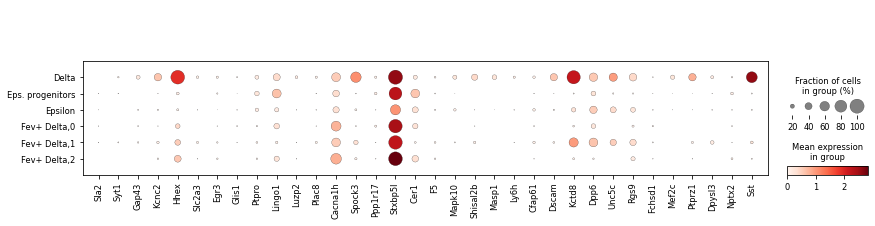

In [127]:
sc.pl.dotplot(adata, delta_markers_present, groupby='Fev_delta_refinement')

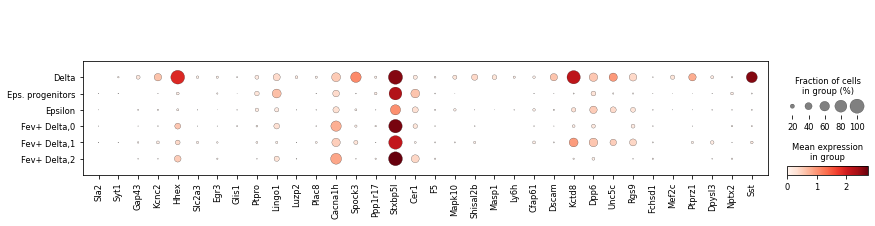

In [128]:
adata_red = adata[~adata.obs['Fev_delta_refinement_gex'].isin(["Fev+ Delta,3", "Fev+ Delta,4"])].copy() # they only contain 1 cell
sc.pl.dotplot(adata_red, delta_markers_present, groupby='Fev_delta_refinement_gex')

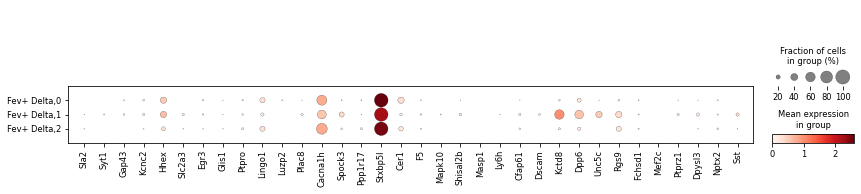

In [88]:
adata_red = adata[~adata.obs['Fev_delta_refinement_atac'].isin(["Fev+ Delta,3"])].copy() # they only contain 1 cell
sc.pl.dotplot(adata_red, delta_markers_present, groupby='Fev_delta_refinement_atac')

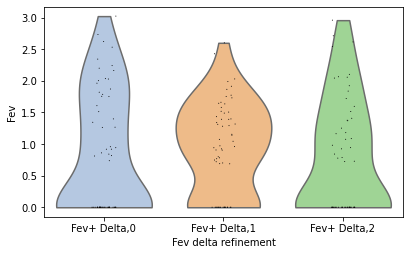

In [104]:
sc.pl.violin(adata, keys="Fev", groupby="Fev_delta_refinement")

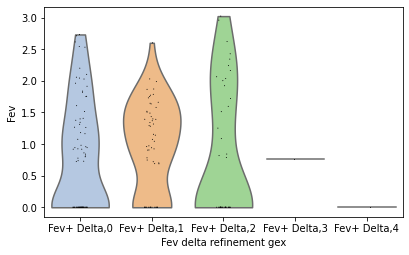

In [105]:
sc.pl.violin(adata, keys="Fev", groupby="Fev_delta_refinement_gex")

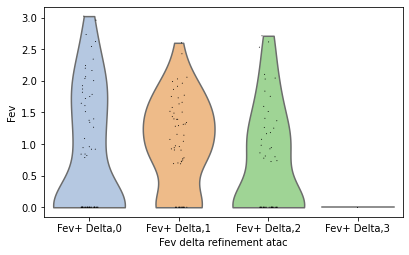

In [106]:
sc.pl.violin(adata, keys="Fev", groupby="Fev_delta_refinement_atac")